## SVM

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
df=pd.read_csv("forestfires.csv")

In [3]:
df.head()

month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  ...  monthfeb  \
0   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0  ...         0   
1   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0  ...         0   
2   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0  ...         0   
3   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2  ...         0   
4   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0  ...         0   

   monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  monthoct  \
0         0         0         0         1         0         0         0   
1         0         0         0         0         0         0         1   
2         0         0         0         0         0         0         1   
3         0         0         0         1         0         0         0   
4         0         0         0         1         0         0         0   

   monthsep  size_category  
0         0          small  
1         0          small  
2         0          small  
3         0          small  
4         0          small  

[5 rows x 31 columns]

In [4]:
df.shape

(517, 31)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [6]:
df.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

<AxesSubplot:>

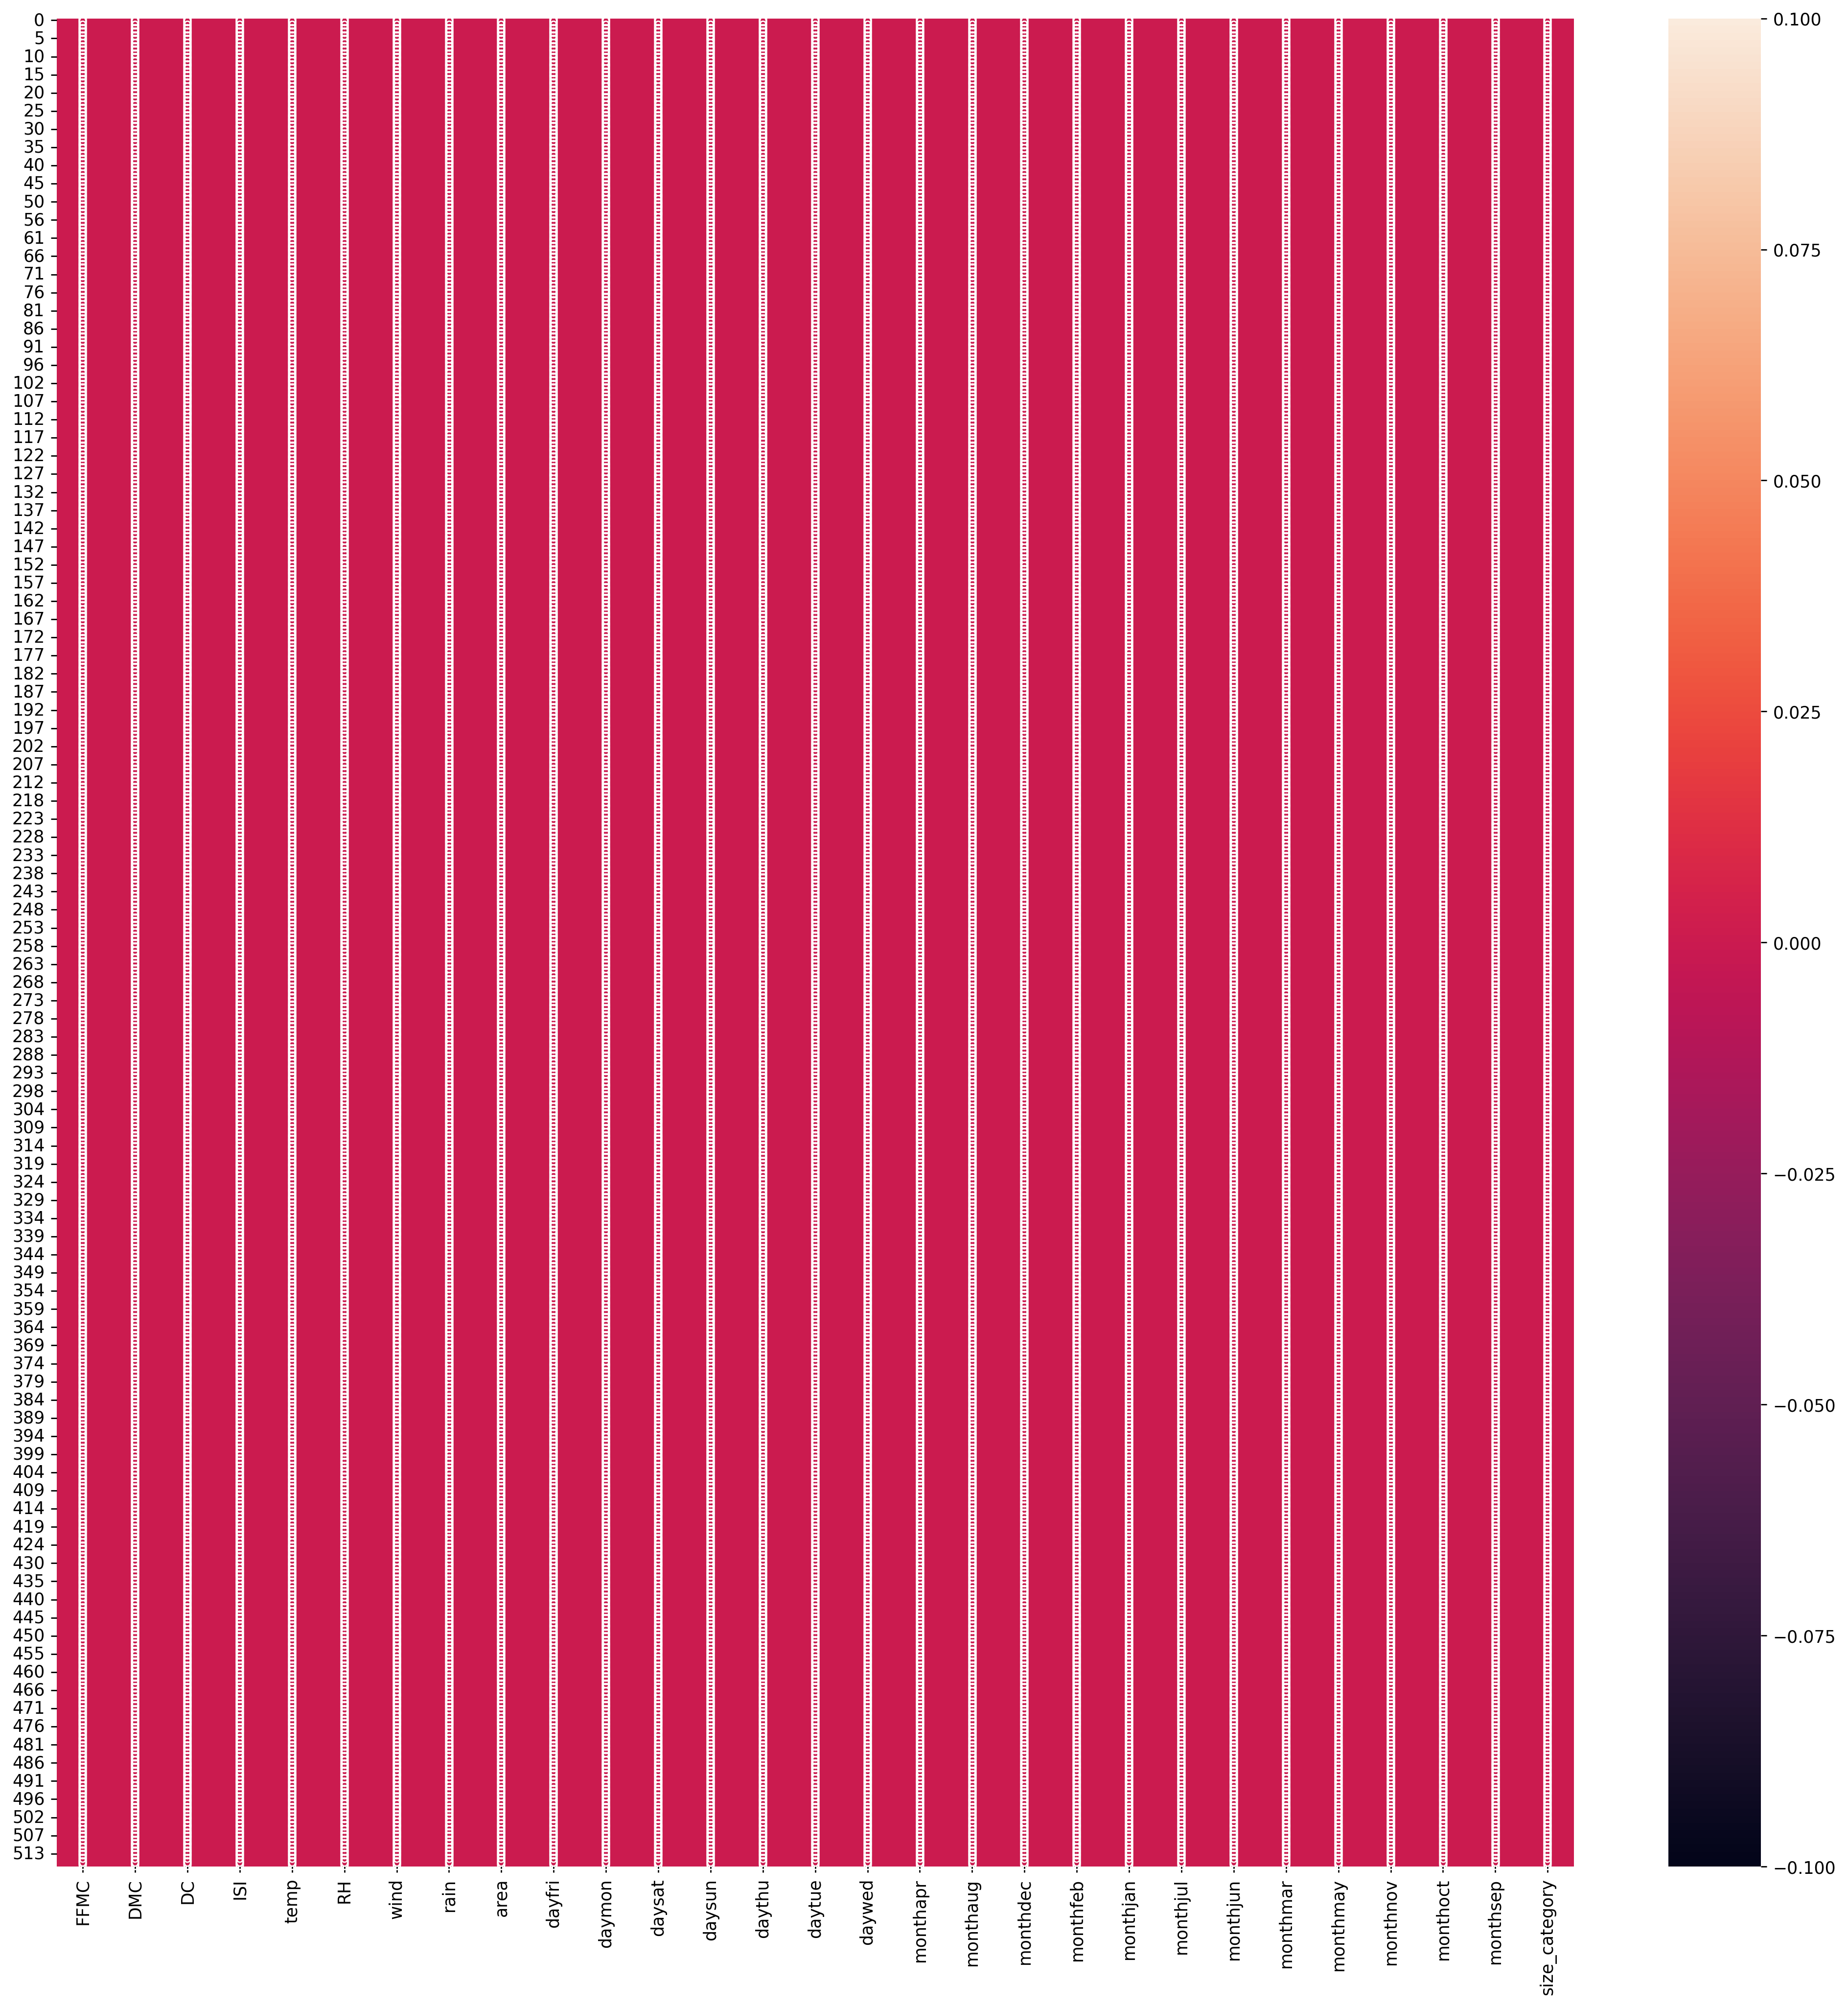

In [35]:
plt.rcParams['figure.figsize'] = (20,20)
plt.rcParams['figure.dpi'] = 250
sns.heatmap(df.isnull(),annot=True)

In [7]:
df.duplicated().sum()

8

In [8]:
df=df.drop_duplicates()

In [9]:
df.duplicated().sum()

0

In [10]:
#Checking CoRelation  using Pearson
df.corr()

FFMC       DMC        DC       ISI      temp        RH  \
FFMC      1.000000  0.382925  0.331956  0.531926  0.431744 -0.306262   
DMC       0.382925  1.000000  0.681446  0.309459  0.470875  0.062772   
DC        0.331956  0.681446  1.000000  0.229757  0.496608 -0.047971   
ISI       0.531926  0.309459  0.229757  1.000000  0.395858 -0.135955   
temp      0.431744  0.470875  0.496608  0.395858  1.000000 -0.532503   
RH       -0.306262  0.062772 -0.047971 -0.135955 -0.532503  1.000000   
wind     -0.030409 -0.104563 -0.202856  0.104834 -0.227754  0.070721   
rain      0.052280  0.071017  0.033772  0.062132  0.067911  0.094343   
area      0.040998  0.076932  0.051542  0.008429  0.099173 -0.074554   
dayfri    0.020889 -0.011152 -0.001642  0.051599 -0.077766  0.069599   
daymon   -0.057581 -0.105205 -0.053198 -0.159333 -0.135289  0.010311   
daysat   -0.021744 -0.003147 -0.029112 -0.037140  0.038863 -0.024118   
daysun   -0.088579  0.028050 -0.002249 -0.005213  0.015661  0.140341   
daythu    0.073127  0.079932  0.047835 -0.019173  0.051864 -0.128270   
daytue    0.007268 -0.002803  0.026066  0.062274  0.034738 -0.021152   
daywed    0.094854  0.021687  0.022670  0.125896  0.091309 -0.087122   
monthapr -0.116738 -0.198536 -0.270129 -0.106785 -0.156825  0.021627   
monthaug  0.225720  0.490160  0.270894  0.337101  0.349583  0.046842   
monthdec -0.136614 -0.177044 -0.106347 -0.162761 -0.329774 -0.047670   
monthfeb -0.281054 -0.319691 -0.402201 -0.250494 -0.319901  0.141593   
monthjan -0.455128 -0.106256 -0.115871 -0.103846 -0.146547  0.171900   
monthjul  0.033137  0.000617 -0.101518  0.020932  0.143987  0.013808   
monthjun -0.041972 -0.047759 -0.178719  0.119765  0.052779  0.014425   
monthmar -0.074706 -0.404974 -0.648890 -0.143589 -0.342129 -0.083581   
monthmay -0.036983 -0.082312 -0.115010 -0.060655 -0.045372  0.087384   
monthnov -0.088879 -0.074642 -0.078927 -0.076748 -0.053720 -0.035967   
monthoct -0.005172 -0.188126  0.094091 -0.071401 -0.052918 -0.072335   
monthsep  0.080444  0.119779  0.538299 -0.069600  0.091428 -0.061631   

              wind      rain      area    dayfri  ...  monthdec  monthfeb  \
FFMC     -0.030409  0.052280  0.040998  0.020889  ... -0.136614 -0.281054   
DMC      -0.104563  0.071017  0.076932 -0.011152  ... -0.177044 -0.319691   
DC       -0.202856  0.033772  0.051542 -0.001642  ... -0.106347 -0.402201   
ISI       0.104834  0.062132  0.008429  0.051599  ... -0.162761 -0.250494   
temp     -0.227754  0.067911  0.099173 -0.077766  ... -0.329774 -0.319901   
RH        0.070721  0.094343 -0.074554  0.069599  ... -0.047670  0.141593   
wind      1.000000  0.059332  0.012623  0.121056  ...  0.270919 -0.028820   
rain      0.059332  1.000000 -0.006511 -0.001723  ... -0.009262 -0.013961   
area      0.012623 -0.006511  1.000000 -0.052390  ...  0.000706 -0.021205   
dayfri    0.121056 -0.001723 -0.052390  1.000000  ... -0.018868  0.047592   
daymon   -0.062712 -0.028473 -0.022178 -0.182056  ...  0.113829  0.002649   
daysat   -0.068421 -0.030252  0.087647 -0.193432  ... -0.058793  0.021400   
daysun    0.025971 -0.015749 -0.020657 -0.210075  ... -0.025435  0.007987   
daythu   -0.055820 -0.025236  0.020685 -0.161357  ... -0.002816 -0.042571   
daytue    0.052331  0.127243 -0.001002 -0.165896  ... -0.005158 -0.014599   
daywed   -0.022181 -0.019189 -0.011046 -0.150484  ...  0.003068 -0.035839   
monthapr  0.048864 -0.009262 -0.008589 -0.018868  ... -0.018000 -0.027133   
monthaug  0.027413  0.088572 -0.000948 -0.100652  ... -0.098386 -0.148305   
monthdec  0.270919 -0.009262  0.000706 -0.018868  ...  1.000000 -0.027133   
monthfeb -0.028820 -0.013961 -0.021205  0.047592  ... -0.027133  1.000000   
monthjan -0.070217 -0.004336 -0.012737 -0.027723  ... -0.008427 -0.012702   
monthjul -0.039880 -0.012411  0.005566 -0.048598  ... -0.034750 -0.052381   
monthjun  0.010124 -0.012437 -0.019083 -0.018562  ... -0.024170 -0.036433   
monthmar  0.181610 -0.019189 -0.048394  0.041050  ... -0.045740 -0.068947   


<AxesSubplot:>

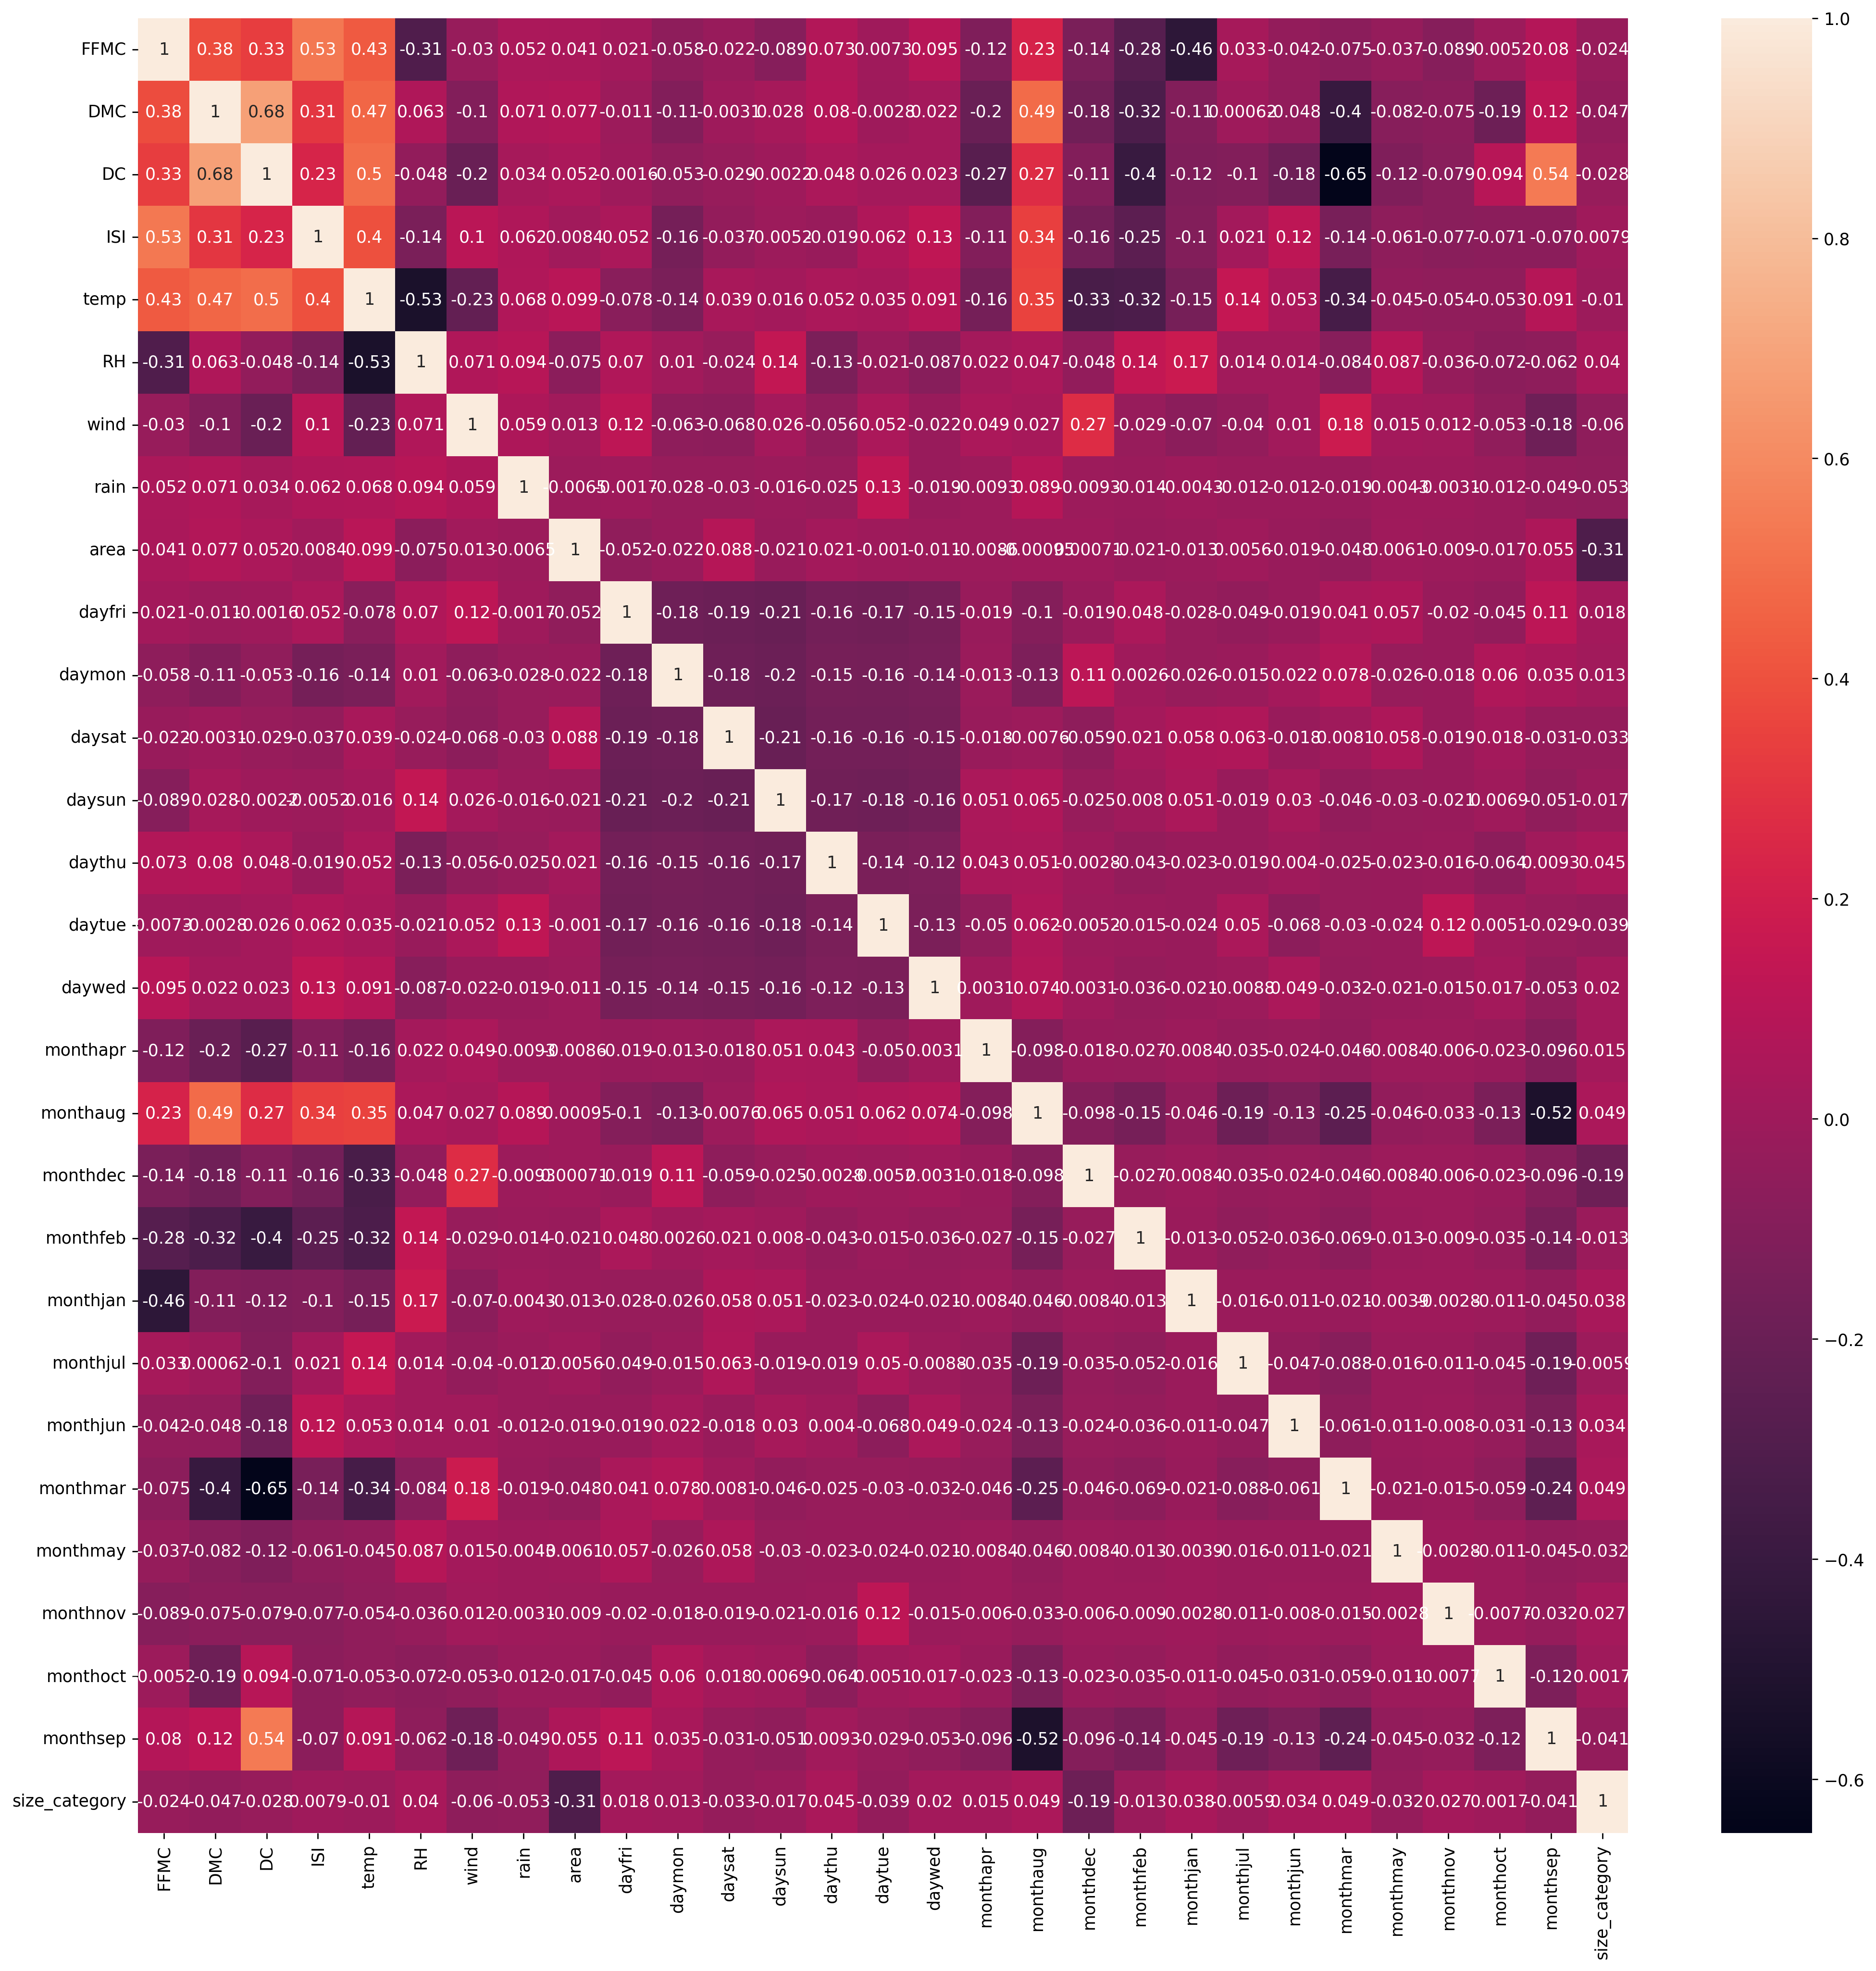

In [33]:
plt.rcParams['figure.figsize'] = (20,20)
plt.rcParams['figure.dpi'] = 250
sns.heatmap(df.corr(),annot=True)

In [11]:
df[df.corr()>80].sum() # No High Correlation Found between Features

month              0
day                0
FFMC             0.0
DMC              0.0
DC               0.0
ISI              0.0
temp             0.0
RH               0.0
wind             0.0
rain             0.0
area             0.0
dayfri           0.0
daymon           0.0
daysat           0.0
daysun           0.0
daythu           0.0
daytue           0.0
daywed           0.0
monthapr         0.0
monthaug         0.0
monthdec         0.0
monthfeb         0.0
monthjan         0.0
monthjul         0.0
monthjun         0.0
monthmar         0.0
monthmay         0.0
monthnov         0.0
monthoct         0.0
monthsep         0.0
size_category      0
dtype: object

In [12]:
#Checking CoRelation  using Spearman Rank 
df.corr(method ='spearman')

FFMC       DMC        DC       ISI      temp        RH  \
FFMC      1.000000  0.515377  0.264832  0.785671  0.600080 -0.330411   
DMC       0.515377  1.000000  0.554870  0.431585  0.504163  0.020878   
DC        0.264832  0.554870  1.000000  0.108383  0.307562  0.016602   
ISI       0.785671  0.431585  0.108383  1.000000  0.419704 -0.181471   
temp      0.600080  0.504163  0.307562  0.419704  1.000000 -0.525573   
RH       -0.330411  0.020878  0.016602 -0.181471 -0.525573  1.000000   
wind     -0.038905 -0.111755 -0.201425  0.131103 -0.179900  0.037785   
rain      0.076639  0.109064  0.005730  0.103301  0.016687  0.172782   
area      0.029208  0.088430  0.070268  0.014064  0.085124 -0.015233   
dayfri    0.004689 -0.031978  0.062291  0.101164 -0.093219  0.075456   
daymon   -0.179821 -0.101208 -0.023785 -0.213455 -0.130530  0.011536   
daysat    0.019192 -0.028898 -0.011148 -0.022773  0.037045 -0.028926   
daysun   -0.077107  0.022536 -0.026258 -0.011753  0.022777  0.132006   
daythu    0.118917  0.071383  0.058197 -0.013209  0.065599 -0.120148   
daytue    0.009463  0.040765 -0.038694  0.038376  0.026371 -0.017201   
daywed    0.140966  0.042313 -0.020839  0.138893  0.092177 -0.092078   
monthapr -0.169330 -0.205704 -0.206212 -0.119842 -0.155280  0.027758   
monthaug  0.343018  0.534483  0.003449  0.372497  0.348497  0.054555   
monthdec -0.196427 -0.185210 -0.134583 -0.190622 -0.225944 -0.053943   
monthfeb -0.306650 -0.325316 -0.314236 -0.285554 -0.281063  0.156209   
monthjan -0.104545 -0.107294 -0.089981 -0.101648 -0.102164  0.104338   
monthjul  0.024328 -0.002066 -0.201759  0.050525  0.148984  0.003885   
monthjun -0.002683 -0.058853 -0.189547  0.028895  0.054216  0.015753   
monthmar -0.233301 -0.425097 -0.470715 -0.149621 -0.377639 -0.103771   
monthmay -0.078569 -0.085386 -0.080791 -0.081126 -0.052364  0.049603   
monthnov -0.073701 -0.075944 -0.051334 -0.074599 -0.057071 -0.042894   
monthoct -0.063744 -0.201772  0.058191 -0.080462 -0.080052 -0.068454   
monthsep  0.075104  0.105684  0.704548 -0.051798  0.072114 -0.044539   

              wind      rain      area    dayfri  ...  monthdec  monthfeb  \
FFMC     -0.038905  0.076639  0.029208  0.004689  ... -0.196427 -0.306650   
DMC      -0.111755  0.109064  0.088430 -0.031978  ... -0.185210 -0.325316   
DC       -0.201425  0.005730  0.070268  0.062291  ... -0.134583 -0.314236   
ISI       0.131103  0.103301  0.014064  0.101164  ... -0.190622 -0.285554   
temp     -0.179900  0.016687  0.085124 -0.093219  ... -0.225944 -0.281063   
RH        0.037785  0.172782 -0.015233  0.075456  ... -0.053943  0.156209   
wind      1.000000  0.117947  0.056848  0.113720  ...  0.195719 -0.048568   
rain      0.117947  1.000000 -0.054052  0.039114  ... -0.015842 -0.023881   
area      0.056848 -0.054052  1.000000 -0.024024  ...  0.161541 -0.003200   
dayfri    0.113720  0.039114 -0.024024  1.000000  ... -0.018868  0.047592   
daymon   -0.080446 -0.048703 -0.004550 -0.182056  ...  0.113829  0.002649   
daysat   -0.061955 -0.051746 -0.000673 -0.193432  ... -0.058793  0.021400   
daysun    0.026030 -0.012555 -0.004862 -0.210075  ... -0.025435  0.007987   
daythu   -0.051455 -0.043165 -0.016325 -0.161357  ... -0.002816 -0.042571   
daytue    0.056616  0.109692  0.036905 -0.165896  ... -0.005158 -0.014599   
daywed   -0.009925  0.014432  0.018739 -0.150484  ...  0.003068 -0.035839   
monthapr  0.038268 -0.015842 -0.009383 -0.018868  ... -0.018000 -0.027133   
monthaug  0.049899  0.090971 -0.002371 -0.100652  ... -0.098386 -0.148305   
monthdec  0.195719 -0.015842  0.161541 -0.018868  ...  1.000000 -0.027133   
monthfeb -0.048568 -0.023881 -0.003200  0.047592  ... -0.027133  1.000000   
monthjan -0.068610 -0.007416 -0.060765 -0.027723  ... -0.008427 -0.012702   
monthjul -0.046033  0.038230 -0.003581 -0.048598  ... -0.034750 -0.052381   
monthjun  0.007726 -0.021273 -0.023933 -0.018562  ... -0.024170 -0.036433   
monthmar  0.191722  0.014432 -0.111118  0.041050  ... -0.045740 -0.068947   


<AxesSubplot:>

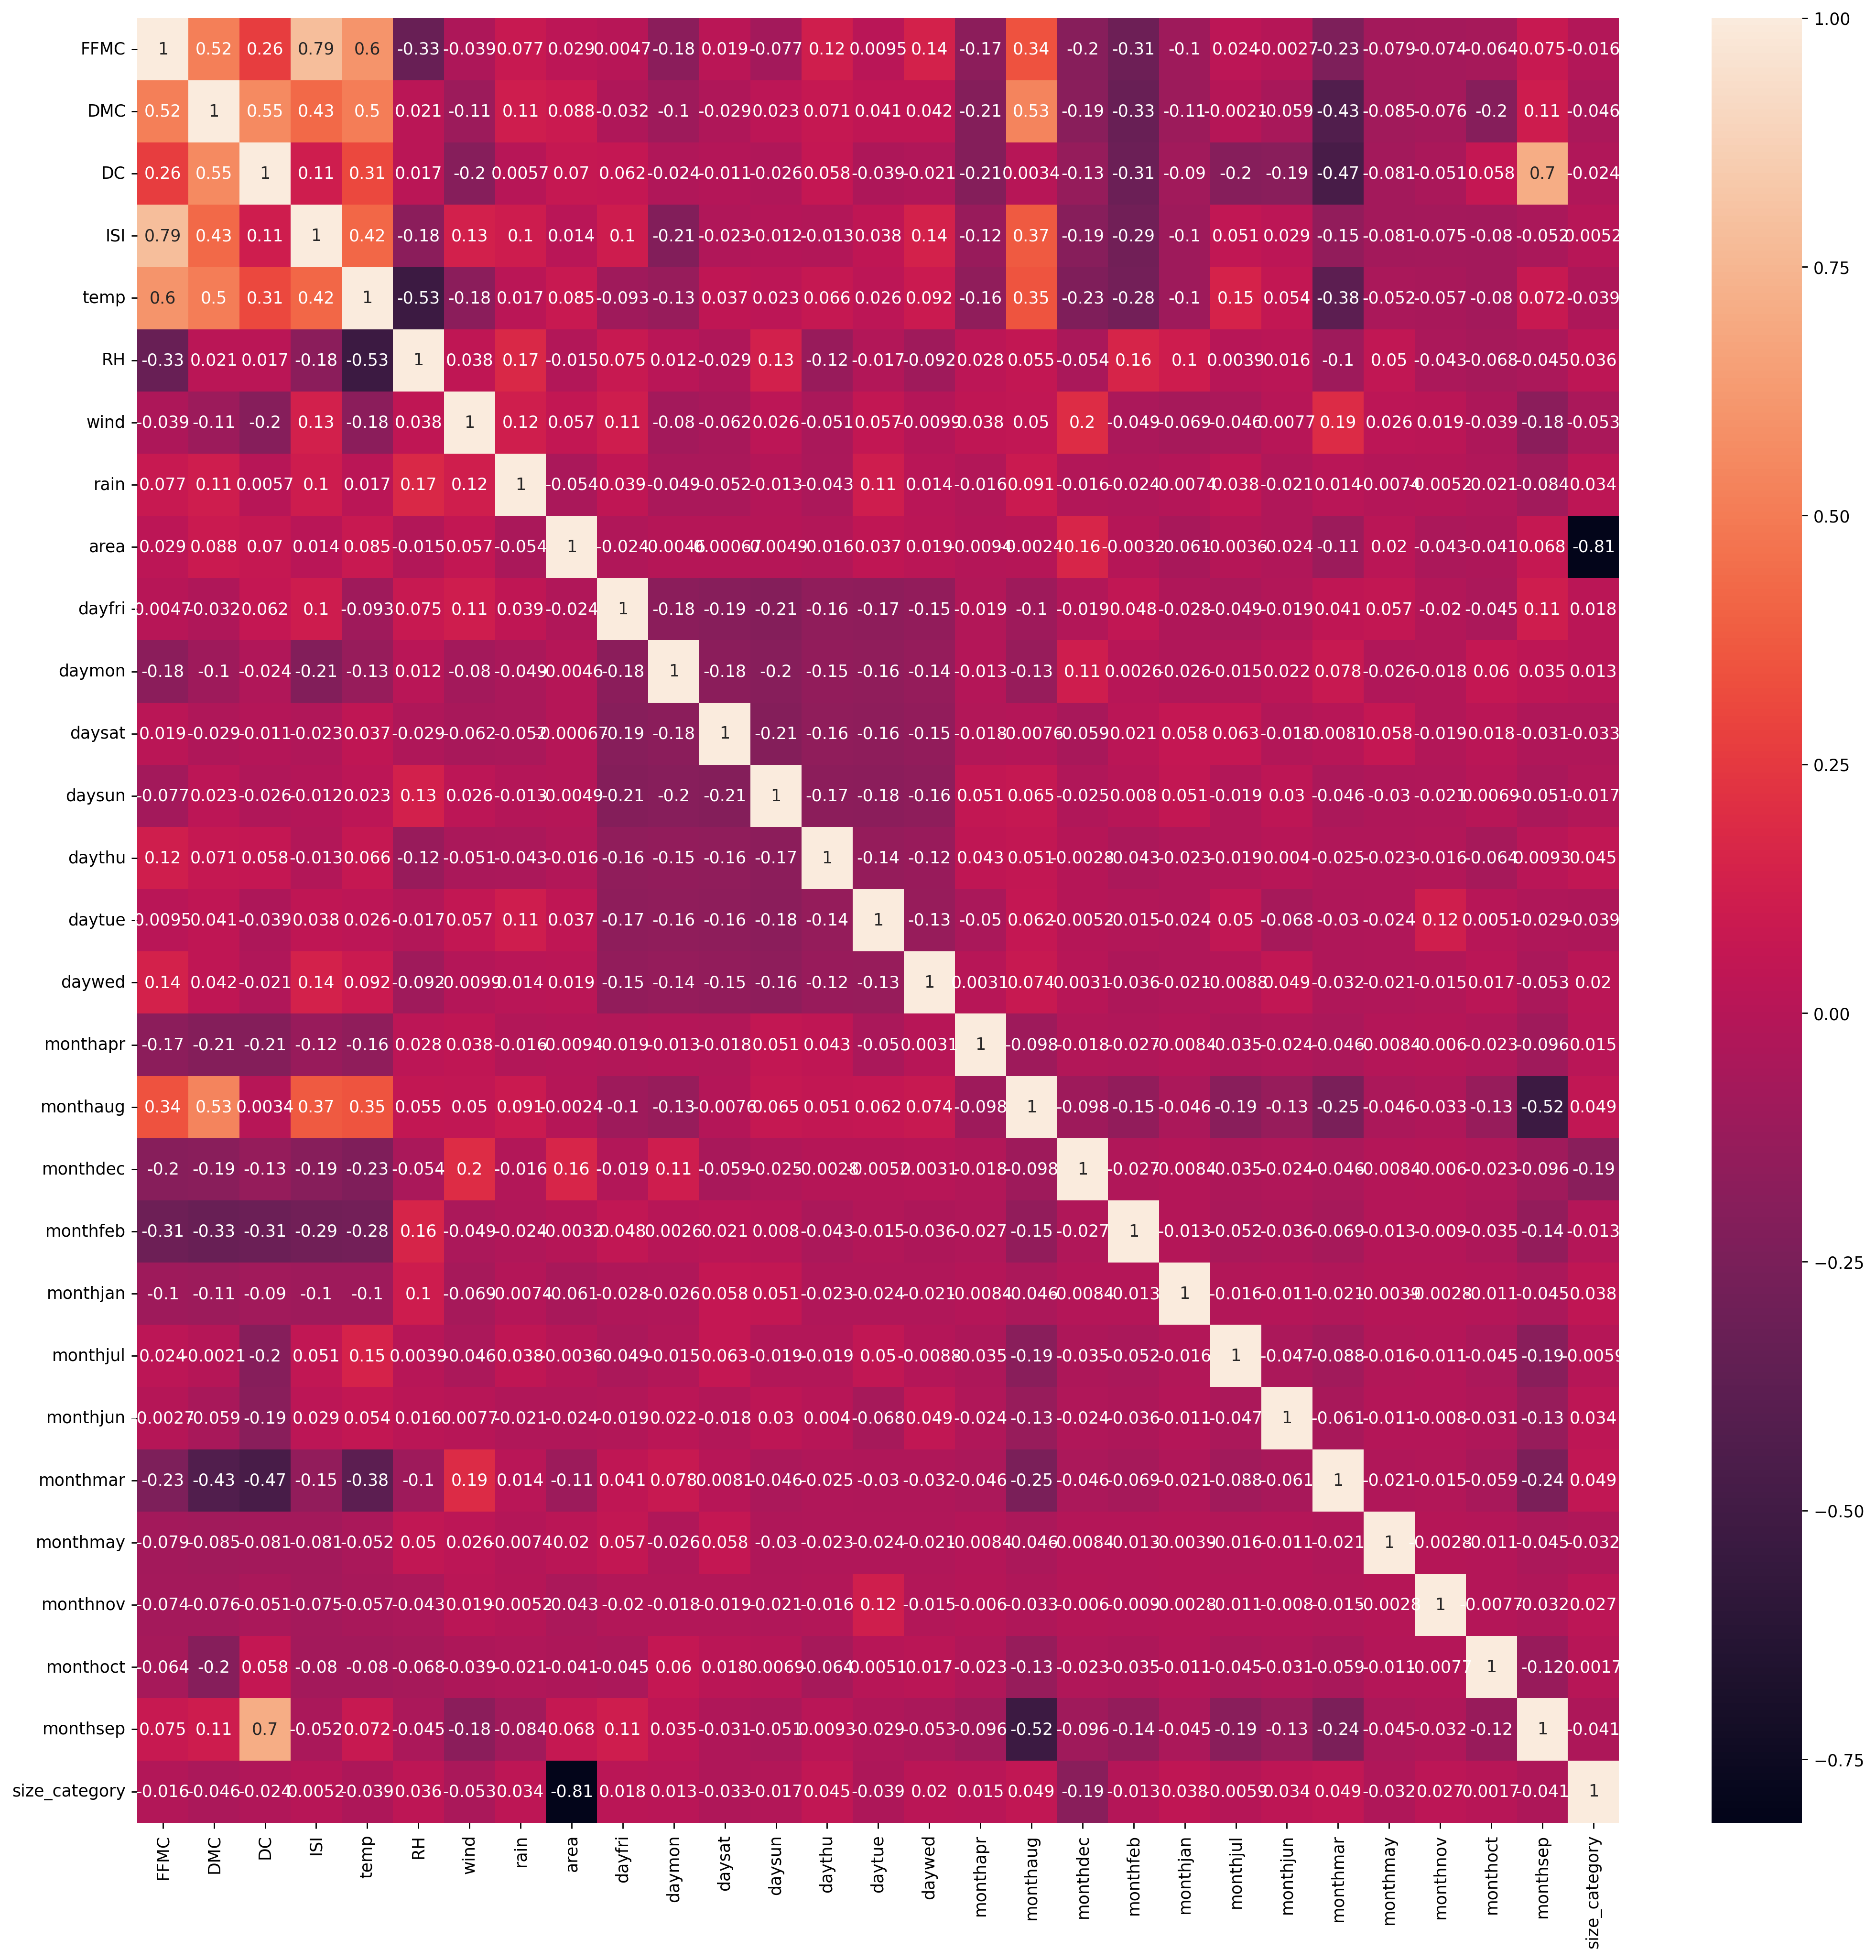

In [34]:
plt.rcParams['figure.figsize'] = (20,20)
plt.rcParams['figure.dpi'] = 250
sns.heatmap(df.corr(method ='spearman'),annot=True)

In [13]:
df[df.corr()>80].sum() # No correation Found

month              0
day                0
FFMC             0.0
DMC              0.0
DC               0.0
ISI              0.0
temp             0.0
RH               0.0
wind             0.0
rain             0.0
area             0.0
dayfri           0.0
daymon           0.0
daysat           0.0
daysun           0.0
daythu           0.0
daytue           0.0
daywed           0.0
monthapr         0.0
monthaug         0.0
monthdec         0.0
monthfeb         0.0
monthjan         0.0
monthjul         0.0
monthjun         0.0
monthmar         0.0
monthmay         0.0
monthnov         0.0
monthoct         0.0
monthsep         0.0
size_category      0
dtype: object

In [14]:
df.describe()

FFMC         DMC          DC         ISI        temp          RH  \
count  509.000000  509.000000  509.000000  509.000000  509.000000  509.000000   
mean    90.618075  110.235756  547.787623    9.023576   18.865422   44.253438   
std      5.555527   63.804112  248.196222    4.585083    5.841083   16.365192   
min     18.700000    1.100000    7.900000    0.000000    2.200000   15.000000   
25%     90.200000   62.300000  437.700000    6.400000   15.400000   32.000000   
50%     91.600000  108.300000  664.200000    8.400000   19.300000   42.000000   
75%     92.900000  141.300000  713.900000   11.000000   22.800000   53.000000   
max     96.200000  291.300000  860.600000   56.100000   33.300000  100.000000   

             wind        rain         area      dayfri  ...    monthdec  \
count  509.000000  509.000000   509.000000  509.000000  ...  509.000000   
mean     4.011395    0.020432    12.992908    0.163065  ...    0.017682   
std      1.800926    0.296261    64.133357    0.369788  ...    0.131921   
min      0.400000    0.000000     0.000000    0.000000  ...    0.000000   
25%      2.700000    0.000000     0.000000    0.000000  ...    0.000000   
50%      4.000000    0.000000     0.610000    0.000000  ...    0.000000   
75%      4.900000    0.000000     6.580000    0.000000  ...    0.000000   
max      9.400000    6.400000  1090.840000    1.000000  ...    1.000000   

         monthfeb    monthjan    monthjul    monthjun    monthmar    monthmay  \
count  509.000000  509.000000  509.000000  509.000000  509.000000  509.000000   
mean     0.039293    0.003929    0.062868    0.031434    0.104126    0.003929   
std      0.194482    0.062622    0.242965    0.174660    0.305724    0.062622   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

         monthnov    monthoct    monthsep  
count  509.000000  509.000000  509.000000  
mean     0.001965    0.029470    0.337917  
std      0.044324    0.169285    0.473466  
min      0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000  
75%      0.000000    0.000000    1.000000  
max      1.000000    1.000000    1.000000  

[8 rows x 28 columns]

In [15]:
df.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [16]:
df["month"].value_counts()

aug    178
sep    172
mar     53
jul     32
feb     20
jun     16
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
Name: month, dtype: int64

In [17]:
from sklearn.preprocessing import LabelEncoder

lb= LabelEncoder()
df["size_category"]=lb.fit_transform(df["size_category"])
df.head()

month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  ...  monthfeb  \
0   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0  ...         0   
1   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0  ...         0   
2   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0  ...         0   
3   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2  ...         0   
4   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0  ...         0   

   monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  monthoct  \
0         0         0         0         1         0         0         0   
1         0         0         0         0         0         0         1   
2         0         0         0         0         0         0         1   
3         0         0         0         1         0         0         0   
4         0         0         0         1         0         0         0   

   monthsep  size_category  
0         0              1  
1         0              1  
2         0              1  
3         0              1  
4         0              1  

[5 rows x 31 columns]

In [18]:
df=df.drop(columns=["month","day"],axis=1)# Dropping columns as it as already encoded using on hot 

In [19]:
df.head()

FFMC   DMC     DC  ISI  temp  RH  wind  rain  area  dayfri  ...  monthfeb  \
0  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0       1  ...         0   
1  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0       0  ...         0   
2  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0       0  ...         0   
3  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0       1  ...         0   
4  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0       0  ...         0   

   monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  monthoct  \
0         0         0         0         1         0         0         0   
1         0         0         0         0         0         0         1   
2         0         0         0         0         0         0         1   
3         0         0         0         1         0         0         0   
4         0         0         0         1         0         0         0   

   monthsep  size_category  
0         0              1  
1         0              1  
2         0              1  
3         0              1  
4         0              1  

[5 rows x 29 columns]

In [20]:
x= df.iloc[:,:-1]
y=  df.iloc[:,-1]

In [21]:
x

FFMC    DMC     DC   ISI  temp  RH  wind  rain   area  dayfri  ...  \
0    86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.00       1  ...   
1    90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.00       0  ...   
2    90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.00       0  ...   
3    91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00       1  ...   
4    89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.00       0  ...   
..    ...    ...    ...   ...   ...  ..   ...   ...    ...     ...  ...   
512  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44       0  ...   
513  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29       0  ...   
514  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16       0  ...   
515  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00       0  ...   
516  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00       0  ...   

     monthdec  monthfeb  monthjan  monthjul  monthjun  monthmar  monthmay  \
0           0         0         0         0         0         1         0   
1           0         0         0         0         0         0         0   
2           0         0         0         0         0         0         0   
3           0         0         0         0         0         1         0   
4           0         0         0         0         0         1         0   
..        ...       ...       ...       ...       ...       ...       ...   
512         0         0         0         0         0         0         0   
513         0         0         0         0         0         0         0   
514         0         0         0         0         0         0         0   
515         0         0         0         0         0         0         0   
516         0         0         0         0         0         0         0   

     monthnov  monthoct  monthsep  
0           0         0         0  
1           0         1         0  
2           0         1         0  
3           0         0         0  
4           0         0         0  
..        ...       ...       ...  
512         0         0         0  
513         0         0         0  
514         0         0         0  
515         0         0         0  
516         1         0         0  

[509 rows x 28 columns]

In [22]:
y

0      1
1      1
2      1
3      1
4      1
      ..
512    0
513    0
514    0
515    1
516    1
Name: size_category, Length: 509, dtype: int32

In [23]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30, random_state=42)
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((356, 28), (153, 28), (356,), (153,))

In [24]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
xtrain=sc.fit_transform(xtrain)
xtest=sc.transform(xtest)

In [25]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

In [26]:
clf = SVC()
param_grid = [{'kernel':['rbf'],'gamma':[50,5,10,0.5],'C':[15,14,13,12,11,10,0.1,0.001] }]
gsv = GridSearchCV(clf,param_grid,cv=10)
gsv.fit(xtrain,ytrain)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [15, 14, 13, 12, 11, 10, 0.1, 0.001],
                          'gamma': [50, 5, 10, 0.5], 'kernel': ['rbf']}])

In [27]:
gsv.best_params_ 

{'C': 15, 'gamma': 10, 'kernel': 'rbf'}

In [28]:
gsv.best_score_ 

0.7473809523809524

In [29]:
clf = SVC(C= 15, gamma = 10)
clf.fit(xtrain , ytrain)
y_pred = clf.predict(xtest)
acc = accuracy_score(ytest, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(ytest, y_pred)

Accuracy = 69.93464052287581


array([[  4,  40],
       [  6, 103]], dtype=int64)